## loading packages

In [3]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot

## fashion MNIST dataset and normalize it

In [4]:
(train_images, train_labels),(test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
train_images = train_images /  255.0
test_images = test_images / 255.0
validation_images = train_images[:5000]
validation_labels = train_labels[:5000]

## plotting some images

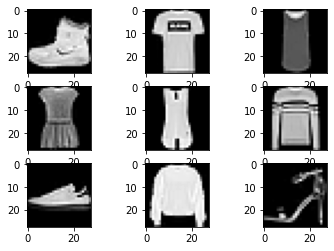

In [11]:
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    pyplot.imshow(train_images[i], cmap=pyplot.get_cmap('gray'))

## creating the model without dropout

In [5]:
class CustomModel(keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.input_layer = keras.layers.Flatten(input_shape=(28,28))
        self.hidden1 = keras.layers.Dense(200, activation='relu')
        self.hidden2 = keras.layers.Dense(100, activation='relu')
        self.hidden3 = keras.layers.Dense(60, activation='relu')
        self.output_layer = keras.layers.Dense(10, activation='softmax')
        self.dropout_layer = keras.layers.Dropout(rate=0.2)
    
    def call(self, input, training=None):
        input_layer = self.input_layer(input)
        hidden1 = self.hidden1(input_layer)
        hidden2 = self.hidden2(hidden1)
        hidden3 = self.hidden3(hidden2)
        output_layer = self.output_layer(hidden3)
        return output_layer

In [6]:
model = CustomModel()
sgd = keras.optimizers.SGD(lr=0.01)
model.compile(loss="sparse_categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])

In [7]:
model.fit(train_images, train_labels, epochs=60, validation_data=(validation_images, validation_labels))

Epoch 1/60
1875/1875 [==============================] - 9s 4ms/step - loss: 1.0619 - accuracy: 0.6489 - val_loss: 0.4954 - val_accuracy: 0.8302
Epoch 2/60
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5001 - accuracy: 0.8258 - val_loss: 0.4171 - val_accuracy: 0.8606
Epoch 3/60
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4419 - accuracy: 0.8454 - val_loss: 0.3799 - val_accuracy: 0.8696
Epoch 4/60
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4080 - accuracy: 0.8552 - val_loss: 0.3616 - val_accuracy: 0.8744
Epoch 5/60
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3800 - accuracy: 0.8638 - val_loss: 0.3497 - val_accuracy: 0.8796
Epoch 6/60
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3633 - accuracy: 0.8709 - val_loss: 0.3331 - val_accuracy: 0.8842
Epoch 7/60
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3503 - accuracy: 0.8758 - val_loss: 0.3381 - val_accuracy:

In [8]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3764 - accuracy: 0.8875


[0.3763779401779175, 0.887499988079071]

## creating the model with dorpout

In [4]:
class CustomModel(keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.input_layer = keras.layers.Flatten(input_shape=(28,28))
        self.hidden1 = keras.layers.Dense(200, activation='relu')
        self.hidden2 = keras.layers.Dense(100, activation='relu')
        self.hidden3 = keras.layers.Dense(60, activation='relu')
        self.output_layer = keras.layers.Dense(10, activation='softmax')
        self.dropout_layer = keras.layers.Dropout(rate=0.2)
    
    def call(self, input, training=None):
        input_layer = self.input_layer(input)
        input_layer = self.dropout_layer(input_layer)
        hidden1 = self.hidden1(input_layer)
        hidden1 = self.dropout_layer(hidden1, training=training)
        hidden2 = self.hidden2(hidden1)
        hidden2 = self.dropout_layer(hidden2, training=training)
        hidden3 = self.hidden3(hidden2)
        hidden3 = self.dropout_layer(hidden3, training=training)
        output_layer = self.output_layer(hidden3)
        return output_layer

In [5]:
model = CustomModel()
sgd = keras.optimizers.SGD(lr=0.01)
model.compile(loss="sparse_categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])

## training the model

In [6]:
model.fit(train_images, train_labels, epochs=60, validation_data=(validation_images, validation_labels))

Epoch 1/60
1875/1875 [==============================] - 11s 5ms/step - loss: 1.4169 - accuracy: 0.4810 - val_loss: 0.5885 - val_accuracy: 0.7868
Epoch 2/60
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7185 - accuracy: 0.7413 - val_loss: 0.4910 - val_accuracy: 0.8276
Epoch 3/60
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6171 - accuracy: 0.7767 - val_loss: 0.4488 - val_accuracy: 0.8412
Epoch 4/60
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5650 - accuracy: 0.7984 - val_loss: 0.4250 - val_accuracy: 0.8476
Epoch 5/60
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5326 - accuracy: 0.8115 - val_loss: 0.4106 - val_accuracy: 0.8534
Epoch 6/60
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5169 - accuracy: 0.8134 - val_loss: 0.3943 - val_accuracy: 0.8550
Epoch 7/60
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4907 - accuracy: 0.8215 - val_loss: 0.3812 - val_accuracy

## evaluating the model

In [7]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3152 - accuracy: 0.8850


[0.31520551443099976, 0.8849999904632568]

## Contact me

### LinkedIn Account
https://www.linkedin.com/in/mohammed-behjoo-446098b7/


### YouTube Channel
https://www.youtube.com/channel/UCudI0gvPh-YbiY2zLM7im-w


### GitHub
https://github.com/mohammedbehjoo